<h1>Análise de dados - Ensino Superior</h1>
<br>

Pesquisa realizada por Gustavo Robert e Rodrigo Querino. Informações cedidas pelo Inep, referente ao ano 2018, acesso disponível <a href='http://portal.inep.gov.br/microdados/'>neste link</a> .

In [3]:
#Importação de bibliotecas

import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [ ]:
#Localização do Arquivo

aluno = pd.read_csv(r'datasets/DM_ALUNO.csv', delimiter='|', encoding='iso-8859-1', usecols=['TP_CATEGORIA_ADMINISTRATIVA', 'CO_UF_NASCIMENTO', 'NU_IDADE', 'TP_SITUACAO', 'TP_ESCOLA_CONCLUSAO_ENS_MEDIO'])
curso = pd.read_csv(r'datasets/DM_CURSO.csv', delimiter='|', encoding='iso-8859-1', usecols=['TP_CATEGORIA_ADMINISTRATIVA', 'CO_UF', 'NO_CURSO', 'TP_SITUACAO', 'QT_INGRESSO_TOTAL', 'QT_CONCLUINTE_TOTAL'])

In [5]:
aluno

,TP_CATEGORIA_ADMINISTRATIVA,NU_IDADE,CO_UF_NASCIMENTO,TP_SITUACAO,TP_ESCOLA_CONCLUSAO_ENS_MEDIO
0,1,26,NaN,2,1
1,1,31,NaN,3,1
2,1,30,NaN,2,1
3,1,30,NaN,3,1
4,1,41,NaN,2,1
...,...,...,...,...,...
12043988,2,18,NaN,2,1
12043989,2,45,35.0,4,1
12043990,2,30,22.0,4,1
12043991,2,20,35.0,4,1


In [6]:
curso

,TP_CATEGORIA_ADMINISTRATIVA,CO_UF,NO_CURSO,TP_SITUACAO,QT_CONCLUINTE_TOTAL,QT_INGRESSO_TOTAL
0,1,51.0,DIREITO,1,76,99
1,1,51.0,CIÊNCIAS ECONÔMICAS,1,38,120
2,1,51.0,ENGENHARIA CIVIL,1,34,53
3,1,51.0,PEDAGOGIA,1,49,98
4,1,51.0,SERVIÇO SOCIAL,1,23,81
...,...,...,...,...,...,...
38251,2,35.0,GESTÃO COMERCIAL,1,0,36
38252,2,35.0,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,1,0,41
38253,2,35.0,GESTÃO DA PRODUÇÃO INDUSTRIAL,1,0,41
38254,2,35.0,GESTÃO DE ENERGIA E EFICIÊNCIA ENERGÉTICA,1,0,41


In [149]:
#Descobrindo cursos que mais tem ingressantes

curso.groupby(['NO_CURSO']).QT_INGRESSO_TOTAL.sum().sort_values(ascending=False)

NO_CURSO
PEDAGOGIA                                                    344296
ADMINISTRAÇÃO                                                283971
DIREITO                                                      251787
EDUCAÇÃO FÍSICA                                              182476
CIÊNCIAS CONTÁBEIS                                           155380
                                                              ...  
QUÍMICA COM ÊNFASE EM BIOTECNOLOGIA                               0
CIÊNCIAS BIOMÉDICAS - ÊNFASE EM CIÊNCIAS BÁSICAS DA SAÚDE         0
EDUCAÇÃO PROFISSIONAL, CIENTÍFICA E TECNOLÓGICA                   0
FORMAÇÃO DE PROFESSORES INDÍGENAS                                 0
CIÊNCIAS BIOMÉDICAS - ÊNFASE EM BIOTECNOLOGIA EM SAÚDE            0
Name: QT_INGRESSO_TOTAL, Length: 1248, dtype: int64

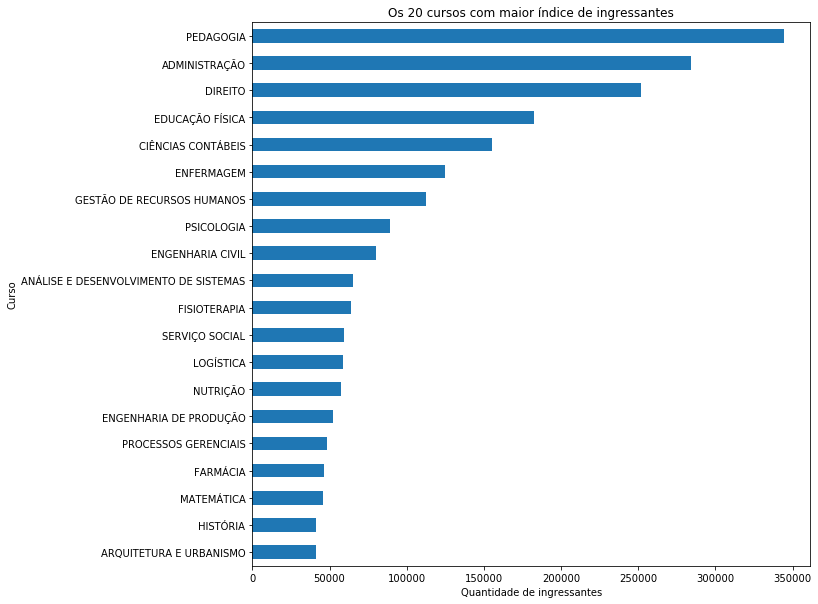

In [148]:
curso.groupby('NO_CURSO').QT_INGRESSO_TOTAL.sum().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

plt.title('Os 20 cursos com maior índice de ingressantes')
plt.xlabel('Quantidade de ingressantes')
plt.ylabel('Curso')
plt.show()

In [143]:
#Descobrindo cursos que mais tem concluintes
curso.groupby(['NO_CURSO']).QT_CONCLUINTE_TOTAL.sum().sort_values(ascending=False)

NO_CURSO
DIREITO                                                                  125911
PEDAGOGIA                                                                122215
ADMINISTRAÇÃO                                                            103061
EDUCAÇÃO FÍSICA                                                           59488
CIÊNCIAS CONTÁBEIS                                                        53231
                                                                          ...  
CIÊNCIAS DA NATUREZA - QUÍMICA                                                0
CIÊNCIAS DA NATUREZA - BIOLOGIA                                               0
LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA                          0
LÍNGUA INGLESA - LINGUÍSTICA APLICADA AO ENSINO DE LÍNGUA ESTRANGEIRA         0
ABI - ARTES CÊNICAS                                                           0
Name: QT_CONCLUINTE_TOTAL, Length: 1248, dtype: int64

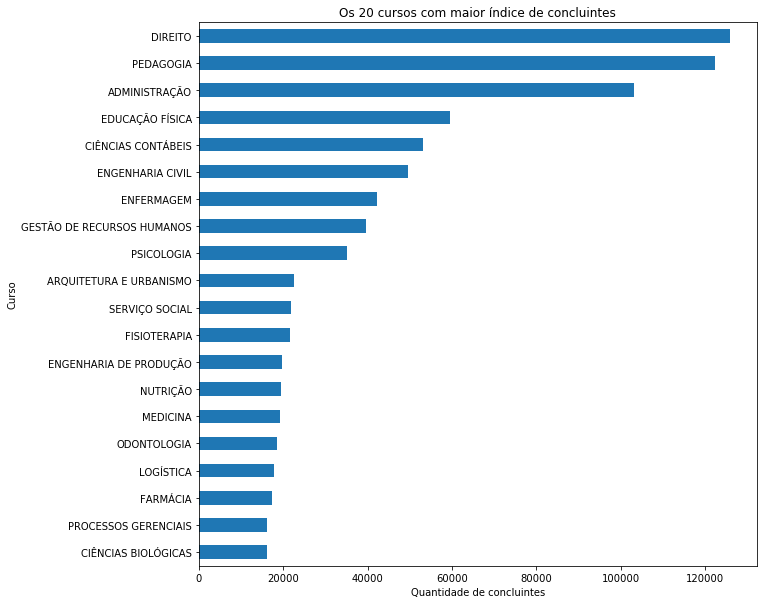

In [168]:
curso.groupby('NO_CURSO').QT_CONCLUINTE_TOTAL.sum().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

plt.title('Os 20 cursos com maior índice de concluintes')
plt.xlabel('Quantidade de concluintes')
plt.ylabel('Curso')
plt.show()

In [150]:
aluno['TP_ESCOLA_CONCLUSAO_ENS_MEDIO'] = aluno['TP_ESCOLA_CONCLUSAO_ENS_MEDIO'].replace({
        1: 'Pública',
        2: 'Privada',
        9: 'Não dispõe da informação'
})

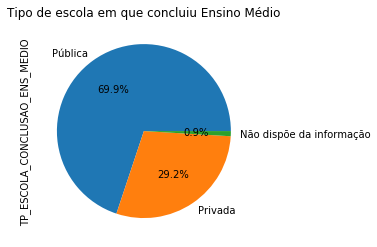

In [166]:
aluno['TP_ESCOLA_CONCLUSAO_ENS_MEDIO'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.title('Tipo de escola em que concluiu Ensino Médio')
plt.show()

In [169]:
aluno['NO_UF'] = aluno['CO_UF_NASCIMENTO'].replace({11: 'Rondônia', 
                                         12: 'Acre', 
                                         13: 'Amazonas', 
                                         14: 'Roraima', 
                                         15: 'Pará', 
                                         16: 'Amapá', 
                                         17: 'Tocantins', 
                                         21: 'Maranhão', 
                                         22: 'Piauí', 
                                         23: 'Ceará', 
                                         24: 'Rio Grande do Norte', 
                                         25: 'Paraíba', 
                                         26: 'Pernambuco', 
                                         27: 'Alagoas', 
                                         28: 'Sergipe', 
                                         29: 'Bahia', 
                                         31: 'Minas Gerais', 
                                         32: 'Espiríto Santo', 
                                         33: 'Rio de Janeiro', 
                                         35: 'São Paulo', 
                                         41: 'Paraná', 
                                         42: 'Santa Catarina', 
                                         43: 'Rio Grande do Sul', 
                                         50: 'Mato Grosso do Sul', 
                                         51: 'Mato Grosso', 
                                         52: 'Goías', 
                                         53: 'Distrito Federal'})

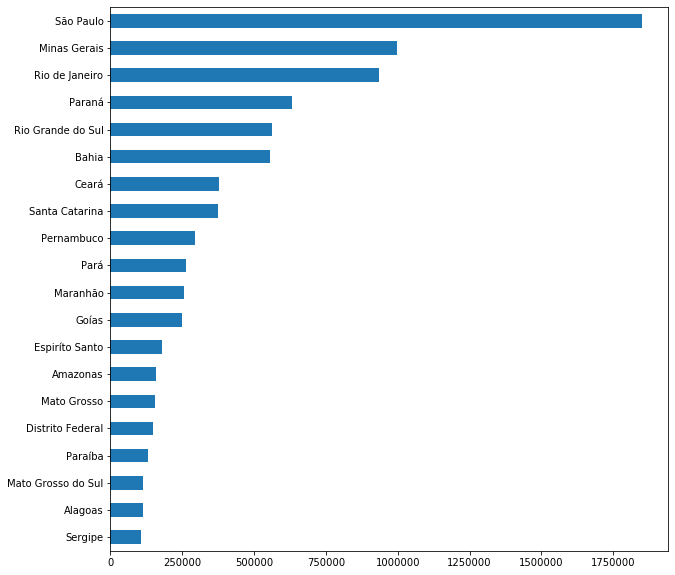

In [178]:
aluno['NO_UF'].value_counts().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

In [174]:
def define_regiao(num):
    if num > 10 and num < 18:
        return 'Norte'
    elif num > 20 and num < 29:
        return 'Nordeste'
    elif num > 30 and num < 36:
        return 'Sudeste'
    elif num > 40 and num < 44:
        return 'Sul'
    elif num > 49 and num < 54:
        return 'Centro-Oeste'
        

aluno['REGIAO'] = aluno['CO_UF_NASCIMENTO'].map(define_regiao)

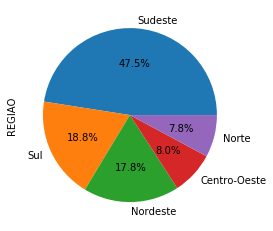

In [177]:
aluno['REGIAO'].value_counts().plot(kind='pie', autopct='%1.1f%%')